I've decided to change up my project a little bit and instead create a contract projection model for MLB Free Agents. I plan to do this by using a combination of WAR, AGE, and Position a cross-referencing that with similar players and the contracts they received in Free Agency. I plan to create a formula using these statistics (and likely a lot more to make the model more precise) to find a "similarity score" between a free agent and other recent signings. We can then use that to estimate the free agent's value on the market. I plan to use Spotrac as my source for free agent contracts. I plan to combine that table with the statistics I found to be available from BaseballReference. If I can combine the two tables and find a way to figure out how to weight each statistic and variable, as far as how much it affects market value, then I can create a formula that will estimate the worth of each player. I can make this as detailed or simply as needed by including more or less variables and/or comparable contracts. I think, overall, this could be a little challenging because I have not built a system like this before, but I find the subject very interesting and I think I'll be able to make it would. As far as visuals go, I think it would be helpful to make correlation tables like the ones we made in class so I can more easily identify which variables effect market value and weight them properly. One limitation I may have with this model is it may require a lot of maintenance in the future because my data sources won't be able to update on their own. However, I think this is mitigated by the way baseball free agency works. Essentially, if I can just update my data once per year, I will be able to project contracts for all free agents in a given class and be done for that year. This could also be helpful when evaluating trades during the season. If I can use my model to understand the market value and compare that to the salary they are making, it can give a team a better understanding of the type of trade package they would need to present to make a deal happen or help evaluate incoming offers. If successful, I think this could be a hugely useful model. Although I'm sure a contract projection system as rudimentary as this isn't exactly a novel idea, I think it'll be beneficial for me to gain a better understanding of how these systems work, so I can improve my own going forward. 

In [33]:
import pandas as pd
pd.read_csv("SR FA Stats 2022.csv")
df_stats = pd.read_csv("SR FA Stats 2022.csv")
df_stats

,Rk,Name,Date,WAR3▼,Yrs,G,AB,R,H,HR,...,ERA,WHIP,G.1,GS,SV,IP,H.1,HR.1,BB.1,SO
0,1,Aaron Judge,12/20/22,17.8,7,729.0,2638.0,535.0,748.0,220.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Carlos Correa,1/11/23,14.3,8,888.0,3346.0,508.0,933.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Trea Turner,12/8/22,14.2,8,849.0,3424.0,586.0,1033.0,124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Xander Bogaerts,12/9/22,12.2,10,1264.0,4834.0,752.0,1410.0,156.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Dansby Swanson,12/21/22,10.4,7,827.0,3043.0,433.0,775.0,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,399,Zach McAllister,12/9/22,NaN,11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,400,Preston Tucker,12/9/22,NaN,7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,401,Tyler White,12/5/22,NaN,6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,402,Ronald Herrera,12/1/22,NaN,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These are all of the easily applicable statistics for free agent signings this offseason. This data set will need a lot of cleaning to get it to be easily readable and match up with my salary statistics. If I can get the correct players and statistics assigned to each contract, I'll be able to use that to create my model. My contract data is sorted to only include players who were unrestricted free agents and signed Major League deals. The stats data includes players who had options exercised or signed minor league contracts. So, I'll have to find a way to remove all of those players from the dataset. I can also add more statistics to this as I go, if I think it will improve the model. Currently, these are just the most basic stats to help me get a feel for the model.

In [28]:
pd.read_csv("Spotrac Free Agents 2022.csv")
df = pd.read_csv("Spotrac Free Agents 2022.csv")
df

,Name,Position,Age,Contract Length,Total $,AAV
0,Aaron Judge QO,RF,30.6,9,"$360,000,000","$40,000,000"
1,Trea Turner QO,SS,29.4,11,"$300,000,000","$27,272,727"
2,Xander Bogaerts QO,SS,30.2,11,"$280,000,000","$25,454,545"
3,Carlos Correa,SS,28.2,6,"$200,000,000","$33,333,333"
4,Jacob deGrom QO,SP,34.4,5,"$185,000,000","$37,000,000"
...,...,...,...,...,...,...
115,Nick Anderson,RP,32.3,1,"$875,000","$875,000"
116,Yu-Cheng Chang,SS,27.4,1,"$850,000","$850,000"
117,Jackson Stephens,RP,28.6,1,"$740,000","$740,000"
118,Tommy La Stella,2B,33.9,1,"$720,000","$720,000"


This table shows the name, position, age, and contract data of all 118 players who signed MLB deals this offseason. There is minimal cleaning that will need to be done on this data. For example, Eric Hosmer is the bottom player shown here and is listed to have signed a $720,000 contract. While that is true, he was also still under contract with the Red Sox at the time of his signing. Meaning, he and the Cubs had little incentive to pay him more than the league minimum. So his contract could skew the data and needs to be removed. Also, you can see in the name column that some players have "QO" next to their name. This means "Qualifying Offer" and essentially means that whatever new team that player signs with will have to give a draft pick to their old team. This can have some effect on the contracts received by mid-market players and is another variable to account for. Although, its effect is greatly diminished as the value of the contract increases.

/var/folders/hz/vggy99z9791d4jlzyvlw3r9w0000gn/T/ipykernel_35339/3819133206.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y1_ticklabels)
/var/folders/hz/vggy99z9791d4jlzyvlw3r9w0000gn/T/ipykernel_35339/3819133206.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticklabels)


[Text(26.0, 0, '26.0 yrs old'),
 Text(28.0, 0, '28.0 yrs old'),
 Text(30.0, 0, '30.0 yrs old'),
 Text(32.0, 0, '32.0 yrs old'),
 Text(34.0, 0, '34.0 yrs old'),
 Text(36.0, 0, '36.0 yrs old'),
 Text(38.0, 0, '38.0 yrs old'),
 Text(40.0, 0, '40.0 yrs old'),
 Text(42.0, 0, '42.0 yrs old'),
 Text(44.0, 0, '44.0 yrs old')]

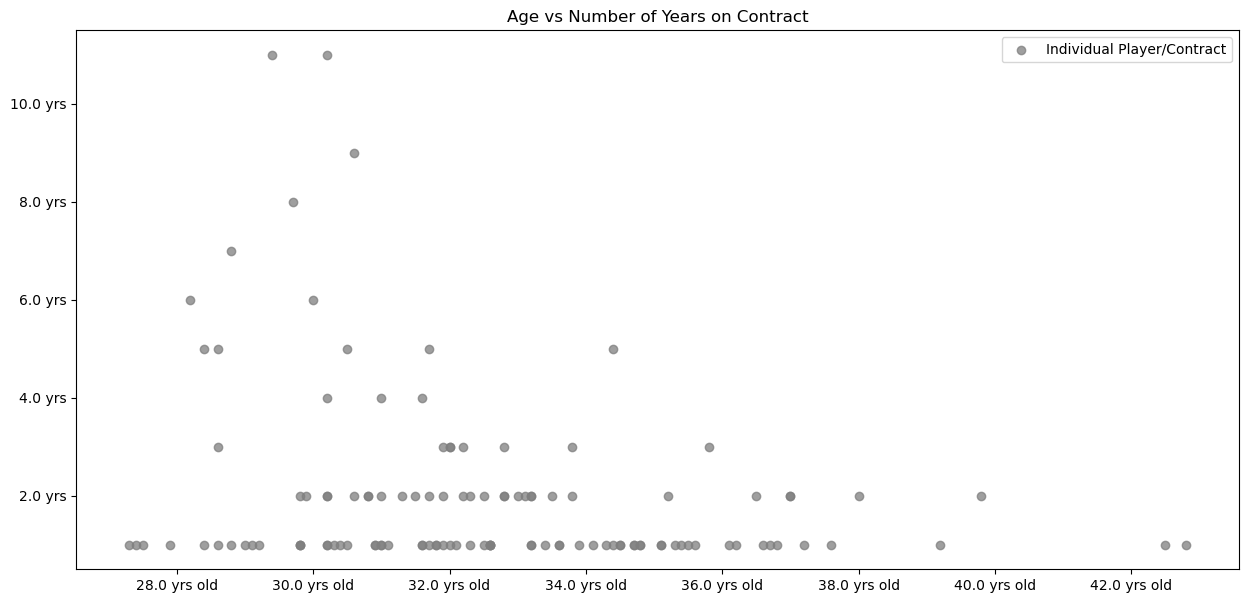

In [32]:
age = df["Age"]
Years = df["Contract Length"]

def plot_df(df, age, year):
    return plot_df
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(Age, Years,
          color = ["C7"],
          alpha = .75,
          )
ax.set_title("Age vs Number of Years on Contract")
ax.legend(["Individual Player/Contract"])
y1_ticklabels = [str(y) + " yrs" for y in ax.get_yticks()]
ax.set_yticklabels(y1_ticklabels)
x_ticklabels = [str(x) + " yrs old" for x in ax.get_xticks()]
ax.set_xticklabels(x_ticklabels)

This graphic shows the negative correlation between the age of a player and the length of the contract they get. As players get older, they can expect to sign shorter term deals. While this is just one offseason worth of contracts, I believe this would hold up with multiple classes of free agents added and I can test that in my project. Also, if we filter out all of the 1 year deals and focus more on multi year deals, the correlation becomes even stronger.

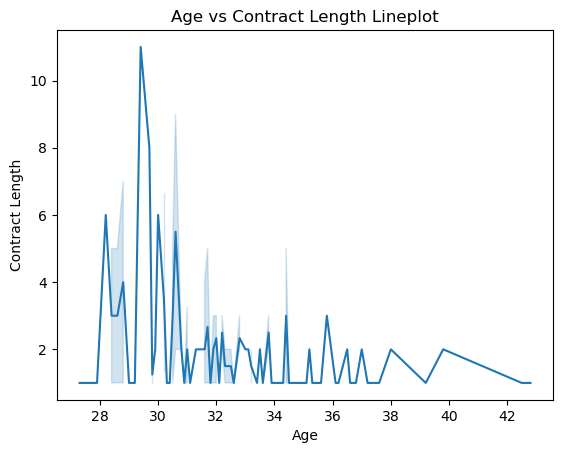

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("Spotrac Free Agents 2022.csv")

sns.lineplot(y="Contract Length", x="Age", data=data)
plt.title('Age vs Contract Length Lineplot')
plt.show()

Another way to show this relationship is with a lineplot. Again this is potentially skewed by the large number of lesser quality, young players that get one year deals. While there are fewer older players getting one year deals, because if they're not good enough to get a multi-year deal by then they are likely already out of the league. Also, with a larger dataset, this would likely smooth out and show a more linear relationship. It would also be smoother if we grouped players into buckets by full year of age. Right now, it is sorted by tenth of a year. So putting players into bigger buckets would help smooth out the big fluctuations. Overall, I think these two visualizations help to paint the picture of the effect age has on contract length. This is only one factor that plays into total contract size, so I would likely need a number of these visualizations in my final project.